Epoch 1/10


c:\Users\dhaks\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1010 - loss: 2.4639 - val_accuracy: 0.0950 - val_loss: 2.3343
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1427 - loss: 2.3001 - val_accuracy: 0.1050 - val_loss: 2.3721
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1452 - loss: 2.2732 - val_accuracy: 0.0850 - val_loss: 2.3774
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1661 - loss: 2.2319 - val_accuracy: 0.0750 - val_loss: 2.3967
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2360 - loss: 2.1977 - val_accuracy: 0.0900 - val_loss: 2.3173
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2295 - loss: 2.1648 - val_accuracy: 0.0750 - val_loss: 2.3152
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2904 - loss: 2.0818 - val_accuracy: 0.1100 - val_loss: 2.4432
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2904 - loss: 2.0577 - val_accuracy: 0.0800 - val_loss: 2.4404
Ep

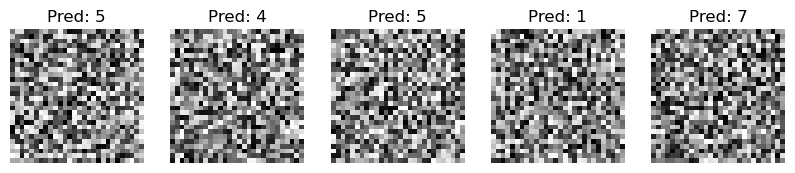

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

num_samples = 1000
num_classes = 10

X = np.random.randint(0, 256, size=(num_samples, 784)).astype(np.float32) 
X /= 255.0 
y = np.random.randint(0, num_classes, size=(num_samples, 1))  

encoder = OneHotEncoder(sparse_output=False, categories=[range(num_classes)])
y_one_hot = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

model = keras.Sequential([
    keras.layers.Dense(128, activation="relu", input_shape=(784,)),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10, activation="softmax")  
])


model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

predictions = model.predict(X_test[:5])

fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i, ax in enumerate(axes):
    ax.imshow(X_test[i].reshape(28, 28), cmap="gray")
    ax.set_title(f"Pred: {np.argmax(predictions[i])}")
    ax.axis("off")
plt.show()
